In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

(0.0, 1.0)

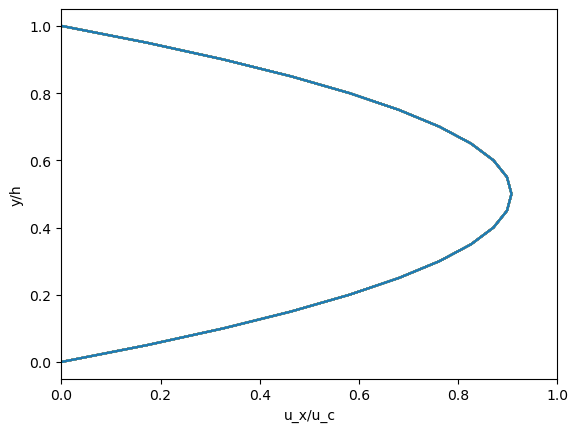

In [7]:
ux = np.loadtxt("ux.txt")
gx = 0.00001
tau = 0.56
ny = 21
nu = (tau - 0.5) / 3.0
h = float(ny)
uc = gx*h**2/(8.0*nu)
y = np.linspace(0, h, ny)/h
x = ux/uc

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel("u_x/u_c")
ax.set_ylabel("y/h")
ax.set_xlim([0, 1])